         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
Slope(m): 0.001678647658597606
Intercept(c): 0.3817128919363822


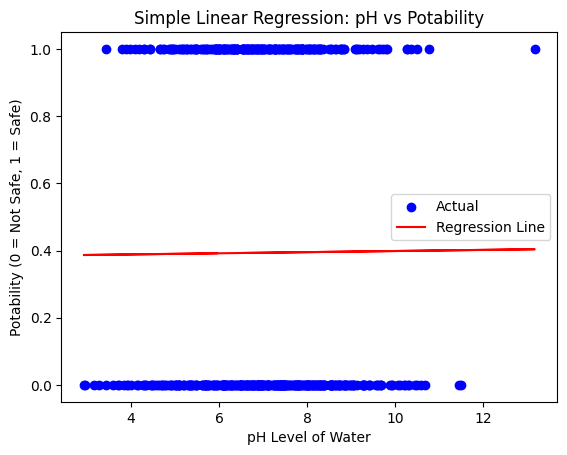

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load Water Potability dataset
data = pd.read_csv("water_potability.csv")
print(data.head())

# Choose one feature (e.g., pH) to predict Potability
X = data[['ph']]            # Independent variable
y = data['Potability']      # Dependent variable (0 or 1)

# Drop rows with missing values in these columns
X = X.dropna()
y = y[X.index]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print slope & intercept
print("Slope(m):", model.coef_[0])
print("Intercept(c):", model.intercept_)

# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Plot regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Labels and title
plt.xlabel('pH Level of Water')
plt.ylabel('Potability (0 = Not Safe, 1 = Safe)')
plt.title('Simple Linear Regression: pH vs Potability')
plt.legend()
plt.show()
